# Verifying Non-Uniformity of Subvolumes
Here, I sample subvolumes of a predetermined size, count the synapse contents, and then plot that distribution in order to show that the synapses are not uniformly distributed.

If they *are* uniformly distributed, then the graph of x-center × y-center × count should be a perfectly straight line.

In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Import data:

In [3]:
import csv

data = open('../data/data.csv', 'r').readlines()
fieldnames = ['x', 'y', 'z', 'unmasked', 'synapses']
reader = csv.reader(data)
reader.next()

rows = [[int(col) for col in row] for row in reader]

sorted_x = sorted(list(set([r[0] for r in rows])))
sorted_y = sorted(list(set([r[1] for r in rows])))
sorted_z = sorted(list(set([r[2] for r in rows])))

vol = np.zeros((len(sorted_x), len(sorted_y), len(sorted_z)))
for r in rows:
    vol[sorted_x.index(r[0]), sorted_y.index(r[1]), sorted_z.index(r[2])] = r[-1]

In [17]:
SUBV_SIZE = (10, 10, 10)
SUBV_COUNT = 500
MGN = 15 # margin

Randomly select `SUBV_COUNT` subvolumes (of size `SUBV_SIZE`) from the larger `vol`ume. Count their contents (sum), and plot x-origin, y-origin, and count (x,y,size).

In [20]:
import random
print vol.shape

sample_vol = vol[MGN : -MGN, MGN : -MGN, :]

subvs = []
for i in range(SUBV_COUNT):
    x_origin = random.randint(0, sample_vol.shape[0] - SUBV_SIZE[0])
    y_origin = random.randint(0, sample_vol.shape[1] - SUBV_SIZE[1])
    z_origin = random.randint(0, sample_vol.shape[2] - SUBV_SIZE[2])
    subv = sample_vol[
        x_origin : x_origin + SUBV_SIZE[0],
        y_origin : y_origin + SUBV_SIZE[1],
        z_origin : z_origin + SUBV_SIZE[2]
    ]
    subvs.append((x_origin, y_origin, z_origin, np.sum(subv)))

(108, 52, 11)


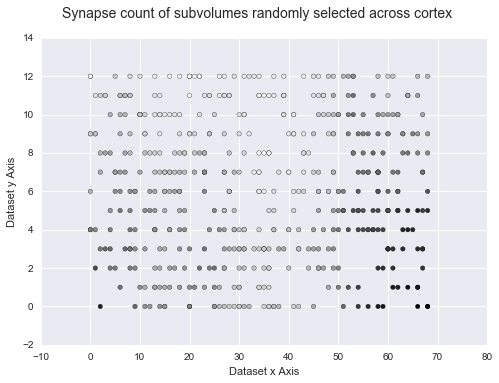

In [21]:
plt.scatter(x=[s[0] for s in subvs], y=[s[1] for s in subvs], c=[s[3]/400 for s in subvs])
plt.xlabel("Dataset x Axis")
plt.ylabel("Dataset y Axis")
plt.suptitle("Synapse count of subvolumes randomly selected across cortex", fontsize="14")

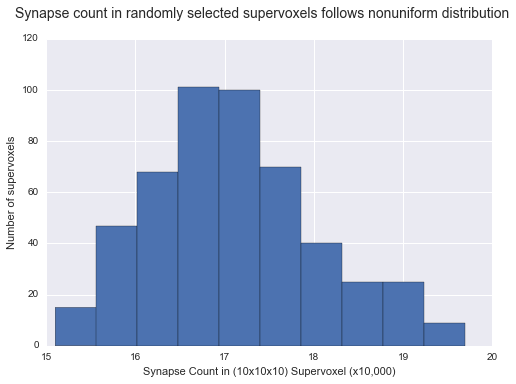

In [30]:
plt.hist([s[3]/10000 for s in subvs])#, y=[s[1] for s in subvs])
plt.xlabel("Synapse Count in (10x10x10) Supervoxel (x10,000)")
plt.ylabel("Number of supervoxels")
plt.suptitle("Synapse count in randomly selected supervoxels follows nonuniform distribution", fontsize="14")

In [ ]:
plt.hist([s[3] for s in subvs])#, y=[s[1] for s in subvs])